<a href="https://colab.research.google.com/github/jcj217-mc/Data_205_Final_Project/blob/main/Data_205_CT_Bail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

**The .csv file is too large to upload to github.  The dataset is available here:** 

https://data.ct.gov/Public-Safety/Accused-Pre-Trial-Inmates-in-Correctional-Faciliti/b674-jy6w 

In [ ]:
# .csv file import
# First, check  working directory
# os.getcwd()
# If need to change working directory
# os.chdir(path)
df = pd.read_csv("Accused_Pre-Trial_Inmates_in_Correctional_Facilities (1).csv", index_col=False)

## **Data Preparation and Wrangling with Pandas and Numpy**

In [ ]:
# Evaluating initial data 
df.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351849 entries, 0 to 5351848
Data columns (total 10 columns):
 #   Column                                            Dtype 
---  ------                                            ----- 
 0   DOWNLOAD DATE                                     object
 1   IDENTIFIER                                        object
 2   LATEST ADMISSION DATE                             object
 3   RACE                                              object
 4   GENDER                                            object
 5   AGE                                               int64 
 6   BOND AMOUNT                                       int64 
 7   OFFENSE                                           object
 8   FACILITY                                          object
 9   DETAINER                                          object
dtypes: int64(2), object(8)
memory usage: 408.3+ MB


In [ ]:
df.describe()

,AGE,BOND AMOUNT
count,5.351849e+06,5.351849e+06
mean,3.460968e+01,2.477388e+05
std,1.139510e+01,4.502701e+05
min,1.500000e+01,1.000000e+00
25%,2.600000e+01,3.350000e+04
50%,3.300000e+01,1.000000e+05
75%,4.200000e+01,2.500000e+05
max,8.700000e+01,9.200000e+06


In [ ]:
#Checking Shape
print(df.shape)

(5351849, 10)


In [ ]:
#Check DataFrame type
type(df)

pandas.core.frame.DataFrame

## **Clean/Arrange Data**

In [ ]:
# change column names
df = df.rename(columns = {"DOWNLOAD DATE": "Download_Date", "LATEST ADMISSION DATE": "Date", "BOND AMOUNT":"Bond"})
df.head()

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
# Drop Columns
df = df.drop(['Download_Date', 'IDENTIFIER', 'FACILITY'], axis = 'columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,DETAINER
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NONE


In [ ]:
df = df.drop([df.columns[-1]], axis='columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF


In [ ]:
# Checking data types for each column
print(df.dtypes)

Date       object
RACE       object
GENDER     object
AGE         int64
Bond        int64
OFFENSE    object
dtype: object


## **Addressing NA/Null Values**

In [ ]:
# Check null 
df.isnull()

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5351844,False,False,False,False,False,False
5351845,False,False,False,False,False,False
5351846,False,False,False,False,False,False
5351847,False,False,False,False,False,False


In [ ]:
# Null sum
df.isnull().sum()

Date       0
RACE       0
GENDER     0
AGE        0
Bond       0
OFFENSE    0
dtype: int64

## **Date/Time**

In [ ]:
# Changing Date to datetime
df.Date = pd.to_datetime(df.Date)

In [ ]:
# add a column for Year
df['Year'] = df['Date'].dt.year
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018


In [ ]:
# Checking data types for each column
print(df.dtypes)

Date       datetime64[ns]
RACE               object
GENDER             object
AGE                 int64
Bond                int64
OFFENSE            object
Year                int64
dtype: object


In [ ]:
# Groupby Decade
df_decade = df.groupby(df.Year // 10 * 10).sum()
df_decade.head()

,AGE,Bond,Year
Year,,,
1980,4605,2305000,154576
1990,56690,129739550,2225173
2000,2314462,12140035808,117485939
2010,158020882,1175134161337,9260608478
2020,24829139,138454390498,1417247860


In [ ]:
# Groupby Decade
df_decade_mean = df.groupby(df.Year // 10 * 10).mean()
df_decade_mean.head()

,AGE,Bond,Year
Year,,,
1980,59.038462,29551.282051,1981.743590
1990,50.888689,116462.791741,1997.462298
2000,39.521567,207302.274649,2006.180441
2010,34.423360,255991.903593,2017.336293
2020,35.390217,197345.984501,2020.074432


In [ ]:
# Groupby Decade
df_decade_median = df.groupby(df.Year // 10 * 10).median()
df_decade_median.head()

,AGE,Bond,Year
Year,,,
1980,61,35000,1980
1990,49,30000,1999
2000,38,50000,2007
2010,32,100000,2018
2020,34,80000,2020


In [ ]:
# importing pandas as pd
import pandas as pd
  
datetime_series = pd.Series(pd.date_range("1980-01-01", periods=3, freq="Y"))
datetime_series

0   1980-12-31
1   1981-12-31
2   1982-12-31
dtype: datetime64[ns]

In [ ]:
# df.groupby(pd.(key='Date',freq='10Y')).sum()

In [ ]:
df_Year = df.groupby('Year').sum()
df_Year

,AGE,Bond
Year,,
1980,3721,2135000
1988,884,170000
1993,1484,140000
1994,456,8000
1996,27491,114419050
1998,68,180000
1999,27191,14992500
2000,101180,341716800
2001,103429,187671450


In [ ]:
df_Year_mean = df.groupby('Year').mean()
df_Year_mean

,AGE,Bond
Year,,
1980,61.000000,35000.000000
1988,52.000000,10000.000000
1993,53.000000,5000.000000
1994,57.000000,1000.000000
1996,54.872255,228381.337325
1998,34.000000,90000.000000
1999,47.288696,26073.913043
2000,43.220846,145970.439983
2001,42.250408,76663.174020


In [ ]:
df_Year_median = df.groupby('Year').median()
df_Year_median

,AGE,Bond
Year,,
1980,61,35000
1988,52,10000
1993,53,5000
1994,57,1000
1996,60,82500
1998,34,90000
1999,48,10000
2000,43,100000
2001,41,25000


## **Examining Types of Crime**

In [ ]:
# Checking data types for each column
print(df.dtypes)

Date       datetime64[ns]
RACE               object
GENDER             object
AGE                 int64
Bond                int64
OFFENSE            object
Year                int64
dtype: object


In [ ]:
# Examining Unique Entries
df.nunique()

Date       3085
RACE          5
GENDER        2
AGE          72
Bond       4121
OFFENSE     371
Year         29
dtype: int64

In [ ]:
# Examining Offense Types Only
df.OFFENSE.nunique()

371

In [ ]:
# Examining Offense Types
offense_array = df.OFFENSE.unique()
#print(offense_array)

In [ ]:
# Convert Array into DataFrame
offense_df = pd.DataFrame(offense_array, columns=['Offense_Type'])
print(offense_df)

                                 Offense_Type
0    CRIMINAL POSS OF PISTOL/REVOLVER      DF
1       VIOLATION OF PROBATION OR COND DISCHG
2                            CRIMINAL ATTEMPT
3    CRIM VIOL OF PROTECTIVE ORDER         DF
4    CRIM VIOL ST CRIM RESTR ORDER         DF
..                                        ...
366                                    SEALED
367  INTENT TO INJURE WITH EXPLOSIVES       F
368  UNLAWFUL ENTRY INTO COIN MACHINE      AM
369  INCSTRUCTION UNLICENSED PERSON IN VEHICL
370  ASSAULT TERMINATING PREGNANCY         AF

[371 rows x 1 columns]


In [ ]:
# Group by offense and bond amount
df_3 = df.groupby(['OFFENSE'], as_index=False).agg({'Bond': sum})
df_3.head()

,OFFENSE,Bond
0,(REPEALED) 53-048,332935000
1,(REPEALED) 53-124,10000
2,(REPEALED) 53-173,274750
3,53A021,883105836
4,53A223C,425900


In [ ]:
df_3['Offense_Total'] = df['OFFENSE']
df_3.head()

,OFFENSE,Bond,Offense_Total
0,(REPEALED) 53-048,332935000,CRIMINAL POSS OF PISTOL/REVOLVER DF
1,(REPEALED) 53-124,10000,VIOLATION OF PROBATION OR COND DISCHG
2,(REPEALED) 53-173,274750,CRIMINAL ATTEMPT
3,53A021,883105836,CRIM VIOL OF PROTECTIVE ORDER DF
4,53A223C,425900,CRIMINAL ATTEMPT


##**Creating New Column with Offense Category**

In [ ]:
# Successfully creating excel sheet with cell output
# offense_df.to_excel("./offensedf3.xlsx")

In [ ]:
# load newly coded .csv 
df_2 = pd.read_csv("offensedf3.csv", index_col=False)
df_2.head()

,Unnamed: 0,Offense_Type,Category
0,0,CRIMINAL POSS OF PISTOL/REVOLVER DF,Weapons
1,1,VIOLATION OF PROBATION OR COND DISCHG,Probation
2,2,CRIMINAL ATTEMPT,Attempt
3,3,CRIM VIOL OF PROTECTIVE ORDER DF,Order
4,4,CRIM VIOL ST CRIM RESTR ORDER DF,Order


Took exported excel sheet and coded each type of offense as one of following:
1. Person
2. Property
3. Probation
4. Order (Violation of Order by Court, Police, or Municipality)
5. Drugs
6. Weapon
7. Juvenile
8. Attempt

In [ ]:
# Sum of each Type of Category
df_2['Category'].value_counts()


Person       153
Property      89
Order         55
Weapons       32
Drugs         23
Attempt        7
Probation      6
ND             4
Juvenile       2
Name: Category, dtype: int64

In [ ]:
# Sum of each Type of Offense
df_offense = df['OFFENSE'].value_counts()
df_offense.head(10)

VIOLATION OF PROBATION OR COND DISCHG       624816
CRIM VIOL OF PROTECTIVE ORDER         DF    271397
INJURY OR RISK OF INJURY TO MINOR      F    245038
ASSAULT, FIRST DEGREE                 BF    215743
ROBBERY, FIRST DEGREE                 BF    199466
MURDER                                AF    181229
BURGLARY, THIRD DEGREE                DF    161147
SEXUAL ASSAULT, FIRST DEGREE           F    150527
ASSAULT ON POLICE OR FIRE OFFICER     CF    127775
CRIMINAL POSSESSION OF A PISTOL       DF    120866
Name: OFFENSE, dtype: int64

In [ ]:
# The pretty print library allows you to print text with line breaks and indents
# instead of one long line
import pprint as pp

# Created a dictionary out of the two Offense Category dataframe columns
OT_dict = dict(zip(df_2.Offense_Type, df_2.Category))
pp.pprint(OT_dict)

{'(REPEALED) 53-048': 'Order',
 '(REPEALED) 53-124': 'Order',
 '(REPEALED) 53-173': 'Order',
 '53A021': 'Order',
 '53A223C': 'Order',
 'ABUSE OF PERSONS-1ST DEGREE           CF': 'Person',
 'ABUSE OF PERSONS-2ND DEGREE           DF': 'Person',
 'ACT OF TERRORISM-ENHANCE SENT': 'Person',
 'ADULTERY                              AM': 'Person',
 'AFFIRMATIVE DEFENSES TO CIMINAL TRESPASS': 'Property',
 'AGGAVTD SEX ASSLT-VCTM < 13YR         AF': 'Person',
 'ALLOWING PERSON UNDER 16 TO OPERATE MV M': 'Person',
 'ALTERING OR REMOVING IDENT NUMBER      F': 'Property',
 'APPLICATION TO PURCHASE A FIREARM': 'Weapons',
 'ARREST WARRANT': 'Order',
 'ARREST WITHOUT WARRANT': 'Order',
 'ARSON, FIRST DEGREE                   AF': 'Property',
 'ARSON, SECOND DEGREE                  BF': 'Property',
 'ARSON, THIRD DEGREE                   CF': 'Property',
 'ASSAULT 2ND DEGREE WITH A FIREARM     DF': 'Weapons',
 'ASSAULT 2ND WITH MV WHILE INTOXICATED DF': 'Person',
 'ASSAULT 2ND, VICTIM 60 OR OVER      

In [ ]:
# create a new column called 'offense_cat' based on dictionary that maps the appropriate category value
# based on the key in the dictionary
# key/value combinations did not have to be unique as long as the key was unique

df['offense_cat'] = df['OFFENSE'].map(OT_dict)

In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt


In [ ]:
# Checking for nulls
df.isnull().sum()

Date           0
RACE           0
GENDER         0
AGE            0
Bond           0
OFFENSE        0
Year           0
offense_cat    0
dtype: int64

In [ ]:
# Checking all offense categories included
df.offense_cat.unique()

array(['Weapons', 'Probation', 'Attempt', 'Order', 'Person', 'Property',
       'Juvenile', 'Drugs', 'ND'], dtype=object)

Note:  ND = Not Disclosed - main offense not provided

In [ ]:
# Sum of each Type of Category
df['offense_cat'].value_counts()

Person       1876856
Property     1152549
Order         676128
Probation     638960
Weapons       405835
Drugs         357636
Attempt       189222
Juvenile       53967
ND               696
Name: offense_cat, dtype: int64

##**Creating New Column with Offense Violence Status**

In [ ]:
# load newly coded .csv 
df_3 = pd.read_csv("violentstatus.csv", index_col=False)
df_3.head()

,offense_cat,violence_status
0,Weapons,Violent
1,Probation,Non_Violent
2,Attempt,Non_Violent
3,Order,Non_Violent
4,Person,Violent


In [ ]:
# The pretty print library allows you to print text with line breaks and indents
# instead of one long line
import pprint as pp

# Created a dictionary out of the two violent status df columns
OT_dict2 = dict(zip(df_3.offense_cat, df_3.violence_status))
pp.pprint(OT_dict2)

{'Attempt': 'Non_Violent',
 'Drugs': 'Non_Violent',
 'Juvenile': 'ND',
 'ND': 'ND',
 'Order': 'Non_Violent',
 'Person': 'Violent',
 'Probation': 'Non_Violent',
 'Property': 'Non_Violent',
 'Weapons': 'Violent'}


In [ ]:
# Created a new column called 'violence_status' based on dictionary that maps the appropriate category value
# based on the key in the dictionary
# key/value combinations did not have to be unique as long as the key was unique

df['violence_status'] = df['offense_cat'].map(OT_dict2)

In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent


## **Comparing Bond Amounts Between Groups**

Our team is interested in exploring the relationship between the following:
- Mean bond amounts for any age in each of the Race groups. 
-  Race of individuals and bond amounts
-  Gender and bond amounts
- Violent/non-violent crimes and bond amounts

In the following 7 chunks of code we synthesize the data in order to obtain the mean bond amounts at the age, and gender levels, for each of the 5 Race groups in the data set.  

In [ ]:
#FEMALES bail data subset
bail_Females = df[df.GENDER == 'F']

In [ ]:
#FEMALE data subset by RACE
F_AMER_IND = bail_Females[bail_Females.RACE == 'AMER IND']
F_ASIAN = bail_Females[bail_Females.RACE == 'ASIAN']
F_BLACK = bail_Females[bail_Females.RACE == 'BLACK']
F_HISPANIC = bail_Females[bail_Females.RACE == 'HISPANIC']
F_WHITE = bail_Females[bail_Females.RACE == 'WHITE']

In [ ]:
#FEMALE bond mean amoounts by age
F_AI_Mean = F_AMER_IND.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_AS_Mean = F_ASIAN.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_BL_Mean = F_BLACK.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_HI_Mean = F_HISPANIC.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_WH_Mean = F_WHITE.groupby(['AGE','RACE','GENDER'], as_index=False).mean()

In [ ]:
F_AI_Mean.head(1)

,AGE,RACE,GENDER,Bond,Year
0,19,AMER IND,F,50000.0,2019.0


In [ ]:
F_AI_Mean.Year = F_AI_Mean.Year.astype(int)
F_AS_Mean.Year = F_AS_Mean.Year.astype(int)
F_BL_Mean.Year = F_BL_Mean.Year.astype(int)
F_HI_Mean.Year = F_HI_Mean.Year.astype(int)
F_WH_Mean.Year = F_WH_Mean.Year.astype(int)

In [ ]:
# Group by year
F_AI_year_mean = F_AI_Mean.groupby('Year').mean()
F_AS_year_mean = F_AS_Mean.groupby('Year').mean()
F_BL_year_mean = F_BL_Mean.groupby('Year').mean()
F_HI_year_mean = F_HI_Mean.groupby('Year').mean()
F_WH_year_mean = F_WH_Mean.groupby('Year').mean()

In [ ]:
F_AI_year_mean

,AGE,Bond
Year,,
2016,38.600000,62878.730270
2017,30.000000,18480.056577
2018,36.000000,30517.361111
2019,34.666667,94678.734827
2020,35.500000,48757.575758
2021,39.500000,62500.000000


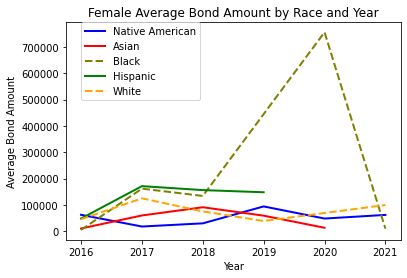

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
#df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( F_AI_year_mean.index, 'Bond', data=F_AI_year_mean, marker='', markerfacecolor='', color='blue', linewidth=2, label = "Native American")
plt.plot( F_AS_year_mean.index, 'Bond', data=F_AS_year_mean, marker='', color='red', linewidth=2, label = "Asian")
plt.plot( F_BL_year_mean.index, 'Bond', data=F_BL_year_mean, marker='', color='olive', linewidth=2, linestyle='dashed', label="Black")
plt.plot( F_HI_year_mean.index, 'Bond', data=F_HI_year_mean, marker='', color='green', linewidth=2, label = "Hispanic")
plt.plot( F_WH_year_mean.index, 'Bond', data=F_WH_year_mean, marker='', color='orange', linewidth=2, linestyle='dashed', label="White")

# show legend

plt.legend()
plt.legend(bbox_to_anchor=(0.4,1),borderaxespad=0)

# labels
plt.title("Female Average Bond Amount by Race and Year")
plt.xlabel("Year")
plt.ylabel("Average Bond Amount")

# show graph
plt.show()

In [ ]:
#MALES bail data subset
bail_Males = df[df.GENDER == 'M']

In [ ]:
#MALE data subset by RACE
M_AMER_IND = bail_Males[bail_Males.RACE == 'AMER IND']
M_ASIAN = bail_Males[bail_Males.RACE == 'ASIAN']
M_BLACK = bail_Males[bail_Males.RACE == 'BLACK']
M_HISPANIC = bail_Males[bail_Males.RACE == 'HISPANIC']
M_WHITE = bail_Males[bail_Males.RACE == 'WHITE']

In [ ]:
#MALE bond mean amoounts by age
M_AI_Mean = M_AMER_IND.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_AS_Mean = M_ASIAN.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_BL_Mean = M_BLACK.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_HI_Mean = M_HISPANIC.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_WH_Mean = M_WHITE.groupby(['AGE','RACE','GENDER'], as_index=False).mean()

In [ ]:
#MALE bond median amoounts by age
M_AI_Median = M_AMER_IND.groupby(['AGE','RACE','GENDER'], as_index=False).median()
M_AS_Median = M_ASIAN.groupby(['AGE','RACE','GENDER'], as_index=False).median()
M_BL_Median = M_BLACK.groupby(['AGE','RACE','GENDER'], as_index=False).median()
M_HI_Median = M_HISPANIC.groupby(['AGE','RACE','GENDER'], as_index=False).median()
M_WH_Median = M_WHITE.groupby(['AGE','RACE','GENDER'], as_index=False).median()

In [ ]:
# Change year to Integer
M_AI_Mean.Year = M_AI_Mean.Year.astype(int)
M_AS_Mean.Year = M_AS_Mean.Year.astype(int)
M_BL_Mean.Year = M_BL_Mean.Year.astype(int)
M_HI_Mean.Year = M_HI_Mean.Year.astype(int)
M_WH_Mean.Year = M_WH_Mean.Year.astype(int)

In [ ]:
# Change year to Integer
M_AI_Median.Year = M_AI_Median.Year.astype(int)
M_AS_Median.Year = M_AS_Median.Year.astype(int)
M_BL_Median.Year = M_BL_Median.Year.astype(int)
M_HI_Median.Year = M_HI_Median.Year.astype(int)
M_WH_Median.Year = M_WH_Median.Year.astype(int)

In [ ]:
# Group by year
M_AI_year_mean = M_AI_Mean.groupby('Year').mean()
M_AS_year_mean = M_AS_Mean.groupby('Year').mean()
M_BL_year_mean = M_BL_Mean.groupby('Year').mean()
M_HI_year_mean = M_HI_Mean.groupby('Year').mean()
M_WH_year_mean = M_WH_Mean.groupby('Year').mean()

In [ ]:
# Group by year
M_AI_year_median = M_AI_Median.groupby('Year').median()
M_AS_year_median = M_AS_Median.groupby('Year').median()
M_BL_year_median = M_BL_Median.groupby('Year').median()
M_HI_year_median = M_HI_Median.groupby('Year').median()
M_WH_year_median = M_WH_Median.groupby('Year').median()

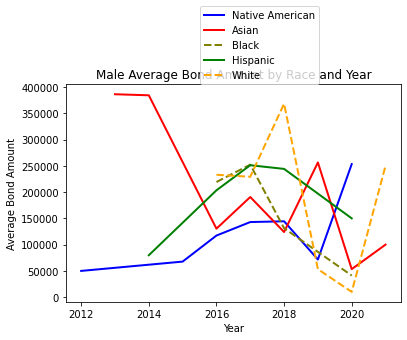

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
#df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( M_AI_year_mean.index, 'Bond', data=M_AI_year_mean, marker='', markerfacecolor='', color='blue', linewidth=2, label = "Native American")
plt.plot( M_AS_year_mean.index, 'Bond', data=M_AS_year_mean, marker='', color='red', linewidth=2, label = "Asian")
plt.plot( M_BL_year_mean.index, 'Bond', data=M_BL_year_mean, marker='', color='olive', linewidth=2, linestyle='dashed', label="Black")
plt.plot( M_HI_year_mean.index, 'Bond', data=M_HI_year_mean, marker='', color='green', linewidth=2, label = "Hispanic")
plt.plot( M_WH_year_mean.index, 'Bond', data=M_WH_year_mean, marker='', color='orange', linewidth=2, linestyle='dashed', label="White")

# show legend

plt.legend()
plt.legend(bbox_to_anchor=(0.4,1),borderaxespad=0)

# labels
plt.title("Male Average Bond Amount by Race and Year")
plt.xlabel("Year")
plt.ylabel("Average Bond Amount")

# show graph
plt.show()

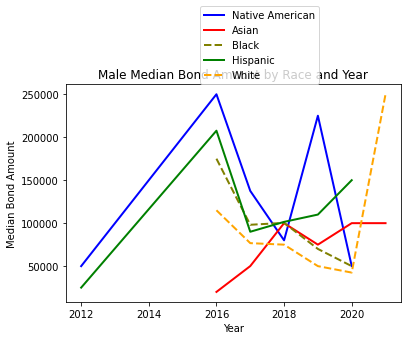

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
#df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( M_AI_year_median.index, 'Bond', data=M_AI_year_median, marker='', markerfacecolor='', color='blue', linewidth=2, label = "Native American")
plt.plot( M_AS_year_median.index, 'Bond', data=M_AS_year_median, marker='', color='red', linewidth=2, label = "Asian")
plt.plot( M_BL_year_median.index, 'Bond', data=M_BL_year_median, marker='', color='olive', linewidth=2, linestyle='dashed', label="Black")
plt.plot( M_HI_year_median.index, 'Bond', data=M_HI_year_median, marker='', color='green', linewidth=2, label = "Hispanic")
plt.plot( M_WH_year_median.index, 'Bond', data=M_WH_year_median, marker='', color='orange', linewidth=2, linestyle='dashed', label="White")

# show legend

plt.legend()
plt.legend(bbox_to_anchor=(0.4,1),borderaxespad=0)

# labels
plt.title("Male Median Bond Amount by Race and Year")
plt.xlabel("Year")
plt.ylabel("Median Bond Amount")

# show graph
plt.show()

In [ ]:
#JOINED "mean" data frames by gender
F_mean_frames = F_AI_Mean.append([F_AS_Mean, F_BL_Mean, F_HI_Mean, F_WH_Mean])
M_mean_frames = M_AI_Mean.append([M_AS_Mean, M_BL_Mean, M_HI_Mean, M_WH_Mean])

In [ ]:
F_mean_frames

,AGE,RACE,GENDER,Bond,Year
0,19,AMER IND,F,50000.000000,2019
1,22,AMER IND,F,100000.000000,2019
2,23,AMER IND,F,12500.000000,2017
3,24,AMER IND,F,25000.000000,2021
4,25,AMER IND,F,24052.083333,2018
...,...,...,...,...,...
54,70,WHITE,F,25361.835749,2016
55,72,WHITE,F,1000.000000,2016
56,74,WHITE,F,2466.666667,2018
57,76,WHITE,F,2500.000000,2019


**Mean Bond Amount vs Age, for each of the 5 Race groups, broken down by gender**

As depicted by the scatter plots below, and the regression line.  In all cases there seems to be correlation between mean bond amounts and the age of the individuals.  

For all, but two of the cases - American Indian females, and White males, the correlation between the mean bond amount and age appears to be negative/inverse.  That is to say that as one variable (i.e age) increases, the other variable decreases (i.e. bond amount). For White males, however, the correlation is positive, as the bond amounts increase with age.

In our analysis, American Indians appear to have no offenses after the age of 60.  It is our suspicion, that this perhaps can be due to their shorter life expectancy in comparison to other races. 

The graphs below also validate our previous calculation of the median/mean age by race and bond amounts.  It clearly illustrates that for Asian, Black, and Hispanic races the highest bond amounts appear to be for individuals in their early 30s, as opposed to bond amounts for White males, which highest bond amounts appear to be for individuals in their late 30s - early 40s. 

After looking at covariance, we could validate the existance of inverse/positive relationships between the bond amounts and the age of the different race groups, as seen in the graphs. While this is easily apparent to the eye, our team wanted to examine the stregth of such relationship for each of the Race groups. After looking at the correlation coefficient for each of the groups we were able to uncover that there is a very strong negative relationship between age and bond amounts for Black males of 87.1%.



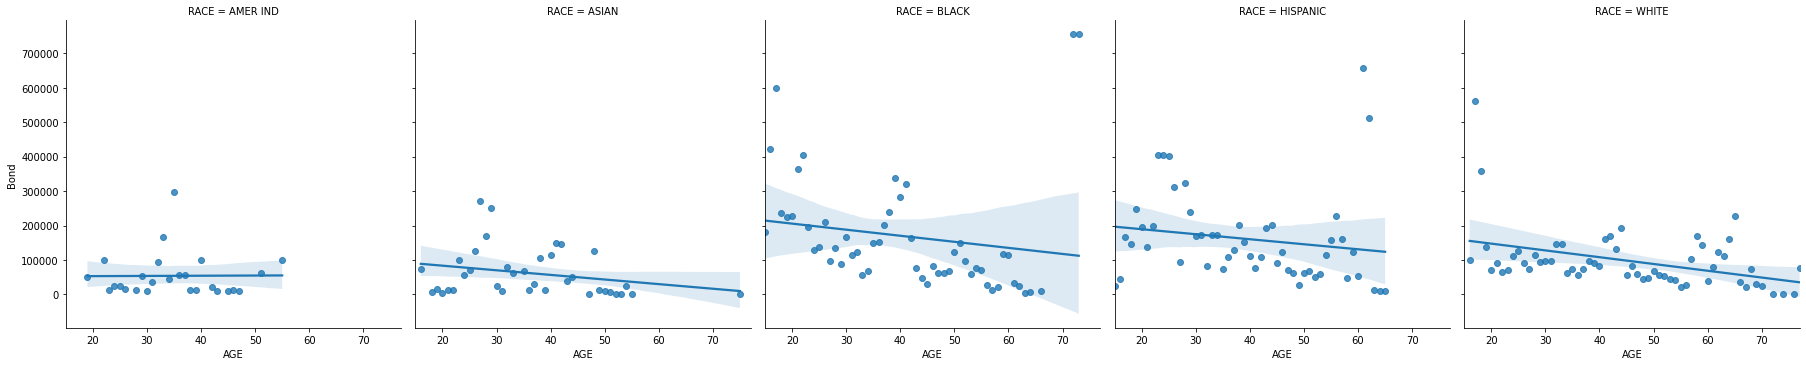

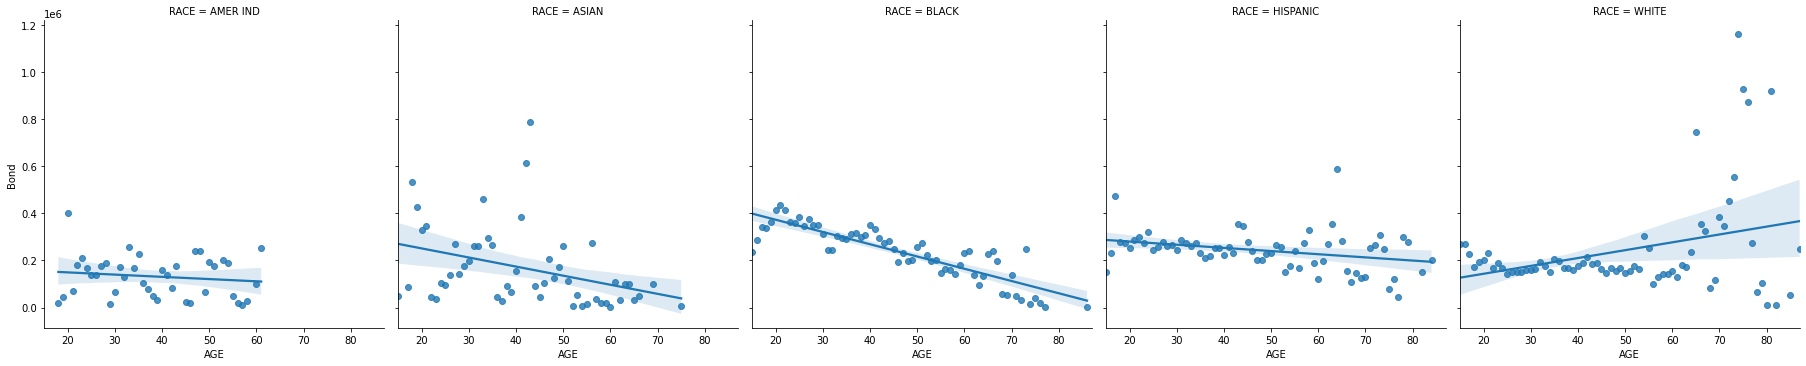

In [ ]:
#FEMALE BOND AMOUNTS vs AGE with regression line &
#MALE BOND AMOUNTS vs AGE with regression line
import seaborn as sns
sns.lmplot(x='AGE',y='Bond', 
           data=F_mean_frames, col='RACE')
plt.show()

sns.lmplot(x='AGE',y='Bond', 
           data=M_mean_frames, col='RACE')
plt.show()

In [ ]:
#Covariance between age and bond amounts for American Indian Females
F_AI_Mean.cov()

,AGE,Bond,Year
AGE,88.000000,5.075401e+03,0.920000
Bond,5075.400781,4.043003e+09,15092.899307
Year,0.920000,1.509290e+04,2.615385


In [ ]:
#Correlation between age and bond amounts for American Indian Females
F_AI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,0.008509,0.060643
Bond,0.008509,1.000000,0.146775
Year,0.060643,0.146775,1.000000


In [ ]:
#Covariance between age and bond amounts for Asian Females
F_AS_Mean.cov()

,AGE,Bond,Year
AGE,175.085586,-2.344931e+05,2.792042
Bond,-234493.067518,4.744560e+09,3346.201494
Year,2.792042,3.346201e+03,1.025526


In [ ]:
#Correlation between age and bond amounts for Asian Females
F_AS_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.257280,0.208364
Bond,-0.257280,1.000000,0.047971
Year,0.208364,0.047971,1.000000


In [ ]:
#Covariance between age and bond amounts for Black Females
F_BL_Mean.cov()

,AGE,Bond,Year
AGE,252.534833,-4.444437e+05,4.459361
Bond,-444443.744806,2.822617e+10,45714.586532
Year,4.459361,4.571459e+04,0.752540


In [ ]:
#Correlation between age and bond amounts for Black Females
F_BL_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.166468,0.323480
Bond,-0.166468,1.000000,0.313664
Year,0.323480,0.313664,1.000000


In [ ]:
#Covariance between age and bond amounts for Hispanic Females
F_HI_Mean.cov()

,AGE,Bond,Year
AGE,221.000000,-3.220174e+05,4.600000
Bond,-322017.405889,1.733117e+10,-1456.897677
Year,4.600000,-1.456898e+03,0.443137


In [ ]:
#Correlation between age and bond amounts for Hispanic Females
F_HI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.164539,0.464828
Bond,-0.164539,1.000000,-0.016624
Year,0.464828,-0.016624,1.000000


In [ ]:
#Covariance between age and bond amounts for White Females
F_WH_Mean.cov()

,AGE,Bond,Year
AGE,304.028054,-5.986842e+05,1.975453
Bond,-598684.193619,7.418801e+09,-11683.927241
Year,1.975453,-1.168393e+04,0.668030


In [ ]:
#Correlation between age and bond amounts for White Females
F_WH_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.398634,0.138615
Bond,-0.398634,1.000000,-0.165968
Year,0.138615,-0.165968,1.000000


In [ ]:
#Covariance between age and bond amounts for American Indian Males
M_AI_Mean.cov()

,AGE,Bond,Year
AGE,162.643902,-1.539443e+05,1.040854
Bond,-153944.298322,7.723833e+09,13153.003770
Year,1.040854,1.315300e+04,1.698780


In [ ]:
#Correlation between age and bond amounts for American Indian Males
M_AI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.137350,0.062618
Bond,-0.137350,1.000000,0.114826
Year,0.062618,0.114826,1.000000


In [ ]:
#Covariance between age and bond amounts for Asian Males
M_AS_Mean.cov()

,AGE,Bond,Year
AGE,249.438316,-9.617335e+05,4.216981
Bond,-961733.494930,2.815690e+10,-64304.173324
Year,4.216981,-6.430417e+04,2.074746


In [ ]:
#Correlation between age and bond amounts for Asian Males
M_AS_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.362895,0.185369
Bond,-0.362895,1.000000,-0.266051
Year,0.185369,-0.266051,1.000000


In [ ]:
#Covariance between age and bond amounts for Black Males
M_BL_Mean.cov()

,AGE,Bond,Year
AGE,3.556667e+02,-1.849666e+06,2.184524
Bond,-1.849666e+06,1.266709e+10,-19909.033638
Year,2.184524e+00,-1.990903e+04,0.289435


In [ ]:
#Correlation between age and bond amounts for Black Males
M_BL_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.871432,0.215308
Bond,-0.871432,1.000000,-0.328804
Year,0.215308,-0.328804,1.000000


In [ ]:
#Covariance between age and bond amounts for Hispanic Males
M_HI_Mean.cov()

,AGE,Bond,Year
AGE,384.797377,-5.172961e+05,1.613297
Bond,-517296.130921,6.949930e+09,6476.893045
Year,1.613297,6.476893e+03,0.519222


In [ ]:
#Correlation between age and bond amounts for Hispanic Males
M_HI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.316325,0.114136
Bond,-0.316325,1.000000,0.107820
Year,0.114136,0.107820,1.000000


In [ ]:
#Covariance between age and bond amounts for White Males
M_WH_Mean.cov()

,AGE,Bond,Year
AGE,4.192919e+02,1.397924e+06,4.759834
Bond,1.397924e+06,4.534590e+10,1794.109673
Year,4.759834e+00,1.794110e+03,0.547619


In [ ]:
#Correlation between age and bond amounts for White Males
M_WH_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,0.320595,0.314119
Bond,0.320595,1.000000,0.011385
Year,0.314119,0.011385,1.000000


In [ ]:
# Overall Median for Bond Amount
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


AGE         33.0
Bond    100000.0
Year      2018.0
dtype: float64

In [ ]:
# Group by Offense then Sum of each race
df_race = df['RACE'].value_counts() 
df_race.head()

BLACK       2206677
WHITE       1663676
HISPANIC    1432744
ASIAN         31994
AMER IND      16758
Name: RACE, dtype: int64

In [ ]:
# Sum of bail amount by race
df_racebail = df.groupby(['RACE'], as_index=False).agg({'Bond': sum})
df_racebail.head()

,RACE,Bond
0,AMER IND,2535846250
1,ASIAN,6745403232
2,BLACK,675255067723
3,HISPANIC,367035798673
4,WHITE,274288516315


In [ ]:
# mean of bail amount and age by race
df_racebailmean = df.groupby(['RACE'], as_index=False).mean()
df_racebailmean.head()

,RACE,AGE,Bond,Year
0,AMER IND,31.753730,151321.532999,2017.811433
1,ASIAN,34.839064,210833.382259,2017.406764
2,BLACK,33.234479,306005.395317,2017.452547
3,HISPANIC,33.557529,256176.817822,2017.631587
4,WHITE,37.364185,164868.950634,2017.668673


In [ ]:
df_2['Category'].value_counts()

Person       153
Property      89
Order         55
Weapons       32
Drugs         23
Attempt        7
Probation      6
ND             4
Juvenile       2
Name: Category, dtype: int64

In [ ]:
# mean of bail amount and age by race
df_yearracebailmean = df.groupby(['Year','RACE'], as_index=False).mean()
df_yearracebailmean.head()

,Year,RACE,AGE,Bond
0,1980,WHITE,61.000000,35000.000000
1,1988,BLACK,52.000000,10000.000000
2,1993,BLACK,53.000000,5000.000000
3,1994,WHITE,57.000000,1000.000000
4,1996,BLACK,43.394558,652612.244898


In [ ]:
df_yearracebailmean.Bond = round(df_yearracebailmean.Bond, 0)
df_yearracebailmean

,Year,RACE,AGE,Bond
0,1980,WHITE,61.000000,35000.0
1,1988,BLACK,52.000000,10000.0
2,1993,BLACK,53.000000,5000.0
3,1994,WHITE,57.000000,1000.0
4,1996,BLACK,43.394558,652612.0
...,...,...,...,...
89,2021,AMER IND,37.489474,340053.0
90,2021,ASIAN,35.926431,109183.0
91,2021,BLACK,34.562622,214242.0
92,2021,HISPANIC,34.148890,167663.0


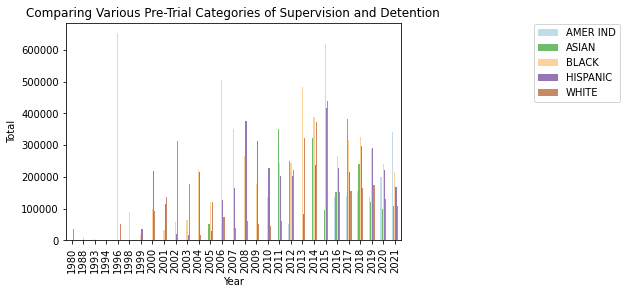

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_yearracebailmean.groupby(['Year', 'RACE'])['Bond'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.67, 1.018])

plt.title('Comparing Various Pre-Trial Categories of Supervision and Detention')
plt.xlabel('Year')
plt.ylabel('Total')

plt.savefig('pretrialcategories.png', dpi=300, bbox_inches = 'tight')

In [ ]:
df_yrbm2010 = df_yearracebailmean[(df_yearracebailmean.Year >= 2010)]
df_yrbm2010.head(1)

,Year,RACE,AGE,Bond
40,2010,AMER IND,30.165217,1000.0


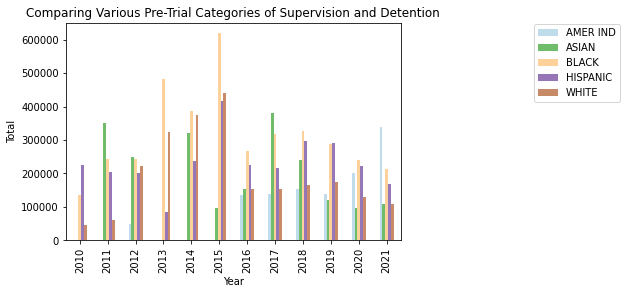

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_yrbm2010.groupby(['Year', 'RACE'])['Bond'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.67, 1.018])

plt.title('Comparing Various Pre-Trial Categories of Supervision and Detention')
plt.xlabel('Year')
plt.ylabel('Total')

plt.savefig('pretrialcategories.png', dpi=300, bbox_inches = 'tight')

In [ ]:
df_yrbm2015 = df_yearracebailmean[(df_yearracebailmean.Year >= 2015)]
df_yrbm2015.head(1)

,Year,RACE,AGE,Bond
60,2015,ASIAN,37.53034,96502.0


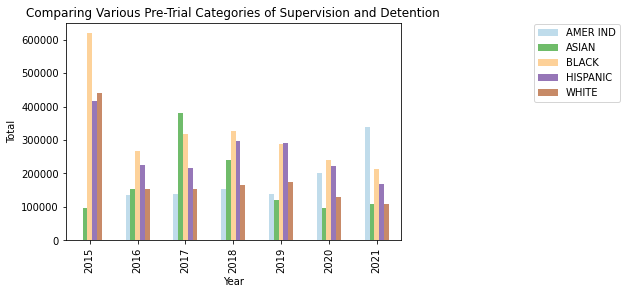

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_yrbm2015.groupby(['Year', 'RACE'])['Bond'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.67, 1.018])

plt.title('Mean Bail Amount by Year & Race')
plt.xlabel('Year')
plt.ylabel('Total')

plt.savefig('pretrialcategories.png', dpi=300, bbox_inches = 'tight')

In [ ]:
df_racecounts = df[(df.Year >= 2015)]
df_racecounts.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent


In [ ]:
df_racecounts = df_racecounts.groupby(["Year"], as_index=False)
df_racecounts.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent
5,2020-01-03,WHITE,M,54,100000,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
6,2020-03-19,HISPANIC,M,35,100000,CRIM VIOL ST CRIM RESTR ORDER DF,2020,Order,Non_Violent
7,2018-12-03,WHITE,M,55,50000,"ASSAULT 2ND, VICTIM 60 OR OVER DF",2018,Person,Violent
8,2020-05-13,BLACK,M,43,10000,INTERFERING WITH AN OFFICER AM,2020,Person,Violent
10,2019-09-18,BLACK,M,46,70000,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent


In [ ]:
df_racecounts = df_racecounts.groupby(["Year"])
df_racecounts.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent
5,2020-01-03,WHITE,M,54,100000,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
6,2020-03-19,HISPANIC,M,35,100000,CRIM VIOL ST CRIM RESTR ORDER DF,2020,Order,Non_Violent
7,2018-12-03,WHITE,M,55,50000,"ASSAULT 2ND, VICTIM 60 OR OVER DF",2018,Person,Violent
8,2020-05-13,BLACK,M,43,10000,INTERFERING WITH AN OFFICER AM,2020,Person,Violent
10,2019-09-18,BLACK,M,46,70000,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent


In [ ]:
df_racecounts = pd.DataFrame(df_racecounts)
df_racecounts

RACE
Year RACE           
1980 WHITE        61
1988 BLACK        17
1993 BLACK        28
1994 WHITE         8
1996 BLACK       147
...              ...
2021 AMER IND    190
     ASIAN       367
     BLACK     19921
     HISPANIC  14232
     WHITE     17510

[94 rows x 1 columns]

In [ ]:
#rename column
df_racecounts.rename(columns={'RACE' : 'Count'}, inplace=True)

#resetting index
df_racecounts.reset_index(inplace = True)




df_racecounts.head()

,Year,RACE,Count
0,1980,WHITE,61
1,1988,BLACK,17
2,1993,BLACK,28
3,1994,WHITE,8
4,1996,BLACK,147


In [ ]:
df_racecounts = df_racecounts[(df_racecounts.Year >= 2015)]
df_racecounts.head()

,Year,RACE,Count
60,2015,ASIAN,824
61,2015,BLACK,81089
62,2015,HISPANIC,32403
63,2015,WHITE,34401
64,2016,AMER IND,2264


In [ ]:
df_racecountssum = df_racecounts.groupby(["Year"])[['Count']].count()
df_racecountssum

,Count
Year,
2015,148717
2016,776326
2017,1179598
2018,1207005
2019,1102431
2020,649362
2021,52220


In [ ]:
df_racecountvc = df_racecounts.groupby(["Year"])
df_racecountvc = df_racecountvc.RACE.value_counts()
df_racecountvc

Year  RACE    
2015  ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
2016  AMER IND    1
      ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
2017  AMER IND    1
      ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
2018  AMER IND    1
      ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
2019  AMER IND    1
      ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
2020  AMER IND    1
      ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
2021  AMER IND    1
      ASIAN       1
      BLACK       1
      HISPANIC    1
      WHITE       1
Name: RACE, dtype: int64

In [ ]:
df_racepct2015 = df_racecounts[(df_racecounts.Year == 2015)]
df_racepct2015

,Year,RACE,Count
60,2015,ASIAN,824
61,2015,BLACK,81089
62,2015,HISPANIC,32403
63,2015,WHITE,34401


In [ ]:
df_racepct2015['Percent'] = df_racepct2015.Count/1488717 * 100
df_racepct2015.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,RACE,Count,Percent
60,2015,ASIAN,824,0.055350
61,2015,BLACK,81089,5.446905
62,2015,HISPANIC,32403,2.176572
63,2015,WHITE,34401,2.310782


In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent


In [ ]:
df_greater2015 = df[(df.Year >= 2015)]
df_greater2015.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent


<Figure size 1080x720 with 0 Axes>

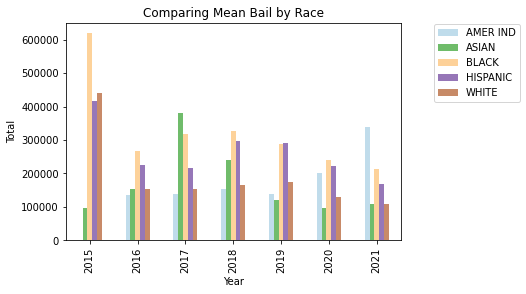

<Figure size 1080x720 with 0 Axes>

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_greater2015.groupby(['Year', 'RACE'])['Bond'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.37, 1.018])

plt.title('Comparing Mean Bail by Race')
plt.xlabel('Year')
plt.ylabel('Total')

# changing the size of figure to 2X2
plt.figure(figsize=(15,10))

#plt.savefig('pretrialcategories.png', dpi=300, bbox_inches = 'tight')

In [ ]:
# median of bail amount by race
df_racebailmed = df.groupby(['RACE'], as_index=False).median()
df_racebailmed.head()

,RACE,AGE,Bond,Year
0,AMER IND,30,100000,2018
1,ASIAN,35,90000,2018
2,BLACK,31,125000,2018
3,HISPANIC,32,100100,2018
4,WHITE,35,60600,2018


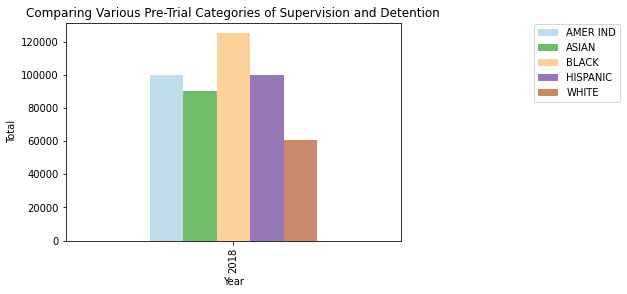

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_racebailmed.groupby(['Year', 'RACE'])['Bond'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.67, 1.018])

plt.title('Comparing Various Pre-Trial Categories of Supervision and Detention')
plt.xlabel('Year')
plt.ylabel('Total')

plt.savefig('pretrialcategories.png', dpi=300, bbox_inches = 'tight')

In [ ]:
df_racebailmean

,RACE,AGE,Bond,Year
0,AMER IND,31.753730,151321.532999,2017.811433
1,ASIAN,34.839064,210833.382259,2017.406764
2,BLACK,33.234479,306005.395317,2017.452547
3,HISPANIC,33.557529,256176.817822,2017.631587
4,WHITE,37.364185,164868.950634,2017.668673


In [ ]:
# median of bail amount by offense category
df_offensebailmed = df.groupby(['offense_cat'], as_index=False).median()
df_offensebailmed

,offense_cat,AGE,Bond,Year
0,Attempt,29,200000,2018
1,Drugs,34,75100,2017
2,Juvenile,17,150000,2019
3,ND,32,20000,2018
4,Order,35,50000,2018
5,Person,33,150000,2018
6,Probation,34,50000,2018
7,Property,32,100000,2018
8,Weapons,29,200000,2018


In [ ]:
# mean of bail amount by offense category
df_offensebailmean = df.groupby(['offense_cat'], as_index=False).mean()
df_offensebailmean

,offense_cat,AGE,Bond,Year
0,Attempt,31.510601,379358.579806,2017.335299
1,Drugs,35.370198,156681.442388,2016.650843
2,Juvenile,17.287046,308812.107121,2018.308225
3,ND,32.024425,281306.709770,2017.616379
4,Order,36.641217,106984.093941,2018.095040
5,Person,35.297016,379458.133454,2017.465940
6,Probation,36.379506,102129.274380,2017.959243
7,Property,33.857662,188043.074293,2017.536505
8,Weapons,30.478325,282559.837961,2017.460367


In [ ]:
# median of bail amount by violence status
df_violencebailmedian = df.groupby(['violence_status'], as_index=False).median()
df_violencebailmedian

,violence_status,AGE,Bond,Year
0,ND,17,150000,2019
1,Non_Violent,33,75000,2018
2,Violent,32,150000,2018


In [ ]:
# mean of bail amount by violence status
df_violencebailmean = df.groupby(['violence_status'], as_index=False).mean()
df_violencebailmean

,violence_status,AGE,Bond,Year
0,ND,17.474690,308461.892962,2018.299416
1,Non_Violent,35.048647,159939.967848,2017.633681
2,Violent,34.440311,362230.782161,2017.464949


In [ ]:
# Group by Race and Year
df_race_year = df.groupby(['Year', 'RACE']).sum()
df_race_year

AGE        Bond
Year RACE                        
1980 WHITE       3721     2135000
1988 BLACK        884      170000
1993 BLACK       1484      140000
1994 WHITE        456        8000
1996 BLACK       6379    95934000
...               ...         ...
2021 AMER IND    7123    64610000
     ASIAN      13185    40070000
     BLACK     688522  4267914717
     HISPANIC  486007  2386174488
     WHITE     660120  1905107955

[94 rows x 2 columns]

In [ ]:
# Group by Race and Year
df_race_year_count = df.groupby(['Year', 'RACE']).count()
df_race_year_count

Date  GENDER    AGE  ...  OFFENSE  offense_cat  violence_status
Year RACE                            ...                                       
1980 WHITE        61      61     61  ...       61           61               61
1988 BLACK        17      17     17  ...       17           17               17
1993 BLACK        28      28     28  ...       28           28               28
1994 WHITE         8       8      8  ...        8            8                8
1996 BLACK       147     147    147  ...      147          147              147
...              ...     ...    ...  ...      ...          ...              ...
2021 AMER IND    190     190    190  ...      190          190              190
     ASIAN       367     367    367  ...      367          367              367
     BLACK     19921   19921  19921  ...    19921        19921            19921
     HISPANIC  14232   14232  14232  ...    14232        14232            14232
     WHITE     17510   17510  17510  ...    17510        17510            17510

[94 rows x 7 columns]

In [ ]:
# Group by Race and Year
df_race_year_mean = df.groupby(['Year', 'RACE']).mean()
df_race_year_mean

AGE           Bond
Year RACE                              
1980 WHITE     61.000000   35000.000000
1988 BLACK     52.000000   10000.000000
1993 BLACK     53.000000    5000.000000
1994 WHITE     57.000000    1000.000000
1996 BLACK     43.394558  652612.244898
...                  ...            ...
2021 AMER IND  37.489474  340052.631579
     ASIAN     35.926431  109182.561308
     BLACK     34.562622  214241.991717
     HISPANIC  34.148890  167662.625632
     WHITE     37.699600  108801.139634

[94 rows x 2 columns]

In [ ]:
df_year_mean = pd.DataFrame(df.groupby(['Year']).mean())
df_year_mean 

,AGE,Bond
Year,,
1980,61.000000,35000.000000
1988,52.000000,10000.000000
1993,53.000000,5000.000000
1994,57.000000,1000.000000
1996,54.872255,228381.337325
1998,34.000000,90000.000000
1999,47.288696,26073.913043
2000,43.220846,145970.439983
2001,42.250408,76663.174020


In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=df_year_mean.index.astype(dtype=str), 
                        y=df_year_mean['Bond'],
                        marker_color='indianred', text="Average Bond"))
fig.update_layout({"title": 'Average Bond by Year',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Average Bond"},
                   "showlegend": False})

fig.show()

In [ ]:
df_year_mean.head()

,AGE,Bond
Year,,
1980,61.000000,35000.000000
1988,52.000000,10000.000000
1993,53.000000,5000.000000
1994,57.000000,1000.000000
1996,54.872255,228381.337325


In [ ]:
# matplotlib barplot
#import matplotlib.pyplot as plt
#x = df['Year']
#y = df['Bond']
#plt.bar(x, y)
#plt.xlabel('Year')
#plt.ylabel('Bond')
#plt.show()

In [ ]:
Count_Females = df[df.GENDER == 'F']
Count_Females

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
12,2019-09-23,BLACK,F,42,70050,"ASSAULT, SECOND DEGREE DF",2019,Person,Violent
25,2019-11-26,HISPANIC,F,60,15200,"FORGERY, FIRST DEGREE CF",2019,Property,Non_Violent
34,2020-05-13,WHITE,F,36,50000,VIOLATION OF PROBATION OR COND DISCHG,2020,Probation,Non_Violent
37,2019-11-15,ASIAN,F,40,10500,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
54,2019-08-13,WHITE,F,28,100000,"SALE OF HEROIN, COC BY NON-DEPENDENT",2019,Drugs,Non_Violent
...,...,...,...,...,...,...,...,...,...
5351763,2018-05-12,HISPANIC,F,26,2500000,CAPITAL FELONY F,2018,Person,Violent
5351796,2020-12-21,WHITE,F,35,500000,"ROBBERY, FIRST DEGREE BF",2020,Property,Non_Violent
5351797,2021-02-18,WHITE,F,36,21500,ASSAULT ON POLICE OR FIRE OFFICER CF,2021,Person,Violent
5351811,2020-08-17,BLACK,F,33,273150,"ARSON, FIRST DEGREE AF",2020,Property,Non_Violent


In [ ]:
#FEMALE data subset by RACE
F_AMER_IND = Count_Females[Count_Females.RACE == 'AMER IND']
F_ASIAN = Count_Females[Count_Females.RACE == 'ASIAN']
F_BLACK = Count_Females[Count_Females.RACE == 'BLACK']
F_HISPANIC = Count_Females[Count_Females.RACE == 'HISPANIC']
F_WHITE = Count_Females[Count_Females.RACE == 'WHITE']

In [ ]:
FAI_bond = F_AMER_IND.drop(F_AMER_IND.columns[[]])
df_1a = df.drop(df.columns[0:1], axis=1)

In [ ]:
#FEMALE total of ppl by held on bond (RACE/YEAR/GENDER COUNT)
F_AI_Count = F_AMER_IND.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_AS_Count = F_ASIAN.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_BL_Count = F_BLACK.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_HI_Count = F_HISPANIC.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_WH_Count = F_WHITE.groupby(['Year','RACE','GENDER'], as_index=False).count()

In [ ]:
#MALES data subset
Count_Males = df[df.GENDER == 'M']
Count_Males

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent
...,...,...,...,...,...,...,...,...,...
5351844,2014-01-02,BLACK,M,22,505500,"ROBBERY, FIRST DEGREE BF",2014,Property,Non_Violent
5351845,2020-12-01,HISPANIC,M,30,75000,"BURGLARY, FIRST DEGREE BF",2020,Property,Non_Violent
5351846,2019-08-12,WHITE,M,34,501400,HOME INVASION AF,2019,Property,Non_Violent
5351847,2021-03-08,HISPANIC,M,28,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2021,Weapons,Violent


In [ ]:
#MALE data subset by RACE
M_AMER_IND = Count_Males[Count_Males.RACE == 'AMER IND']
M_ASIAN = Count_Males[Count_Males.RACE == 'ASIAN']
M_BLACK = Count_Males[Count_Males.RACE == 'BLACK']
M_HISPANIC = Count_Males[Count_Males.RACE == 'HISPANIC']
M_WHITE = Count_Males[Count_Males.RACE == 'WHITE']

In [ ]:
#MALE total of ppl by held on bond (RACE/YEAR/GENDER COUNT)
M_AI_Count = M_AMER_IND.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_AS_Count = M_ASIAN.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_BL_Count = M_BLACK.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_HI_Count = M_HISPANIC.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_WH_Count = M_WHITE.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_WH_Count

,Year,RACE,GENDER,Date,AGE,Bond,OFFENSE,offense_cat,violence_status
0,1980,WHITE,M,61,61,61,61,61,61
1,1994,WHITE,M,8,8,8,8,8,8
2,1996,WHITE,M,354,354,354,354,354,354
3,2000,WHITE,M,167,167,167,167,167,167
4,2001,WHITE,M,924,924,924,924,924,924
5,2002,WHITE,M,458,458,458,458,458,458
6,2003,WHITE,M,653,653,653,653,653,653
7,2004,WHITE,M,75,75,75,75,75,75
8,2005,WHITE,M,1780,1780,1780,1780,1780,1780
9,2006,WHITE,M,1201,1201,1201,1201,1201,1201


In [ ]:
#JOINED "Count" data frames by gender/race
F_count_frames = F_AI_Count.append([F_AS_Count, F_BL_Count, F_HI_Count, F_WH_Count])
M_count_frames = M_AI_Count.append([M_AS_Count, M_BL_Count, M_HI_Count, M_WH_Count])

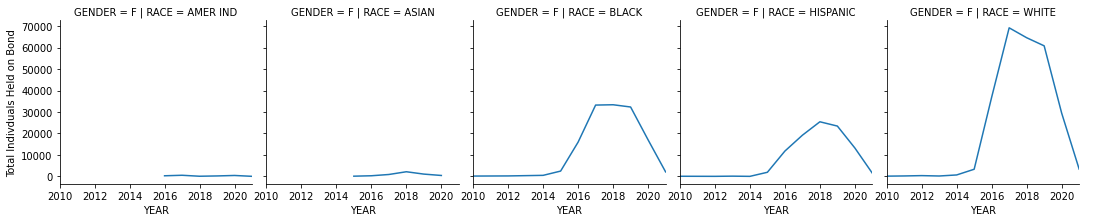

In [ ]:
g = sns.FacetGrid(F_count_frames, col="RACE", row="GENDER")
g.map_dataframe(sns.lineplot, x="Year", y= "Date")
g.set_axis_labels("YEAR", "Total Indivduals Held on Bond")
plt.xlim(2010,2021)
g.add_legend()

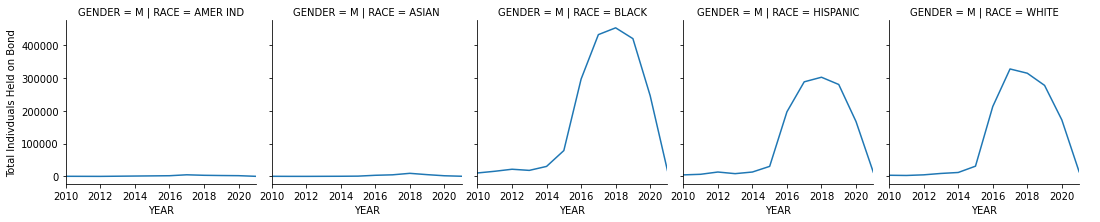

In [ ]:
g = sns.FacetGrid(M_count_frames, col="RACE", row="GENDER")
g.map_dataframe(sns.lineplot, x="Year", y="Date")
g.set_axis_labels("YEAR", "Total Indivduals Held on Bond")
plt.xlim(2010,2021)
g.add_legend()

In [ ]:
# Group by race & gender & bail amounts 
df_race_gender_average= df.groupby(['GENDER', 'RACE'])['Bond'].mean()
df_race_gender_average

GENDER  RACE    
F       AMER IND    106903.954802
        ASIAN        92171.212535
        BLACK       168174.505839
        HISPANIC    190300.492827
        WHITE        98719.901143
M       AMER IND    155987.355753
        ASIAN       232698.213503
        BLACK       315178.679255
        HISPANIC    260947.448860
        WHITE       177646.664999
Name: Bond, dtype: float64

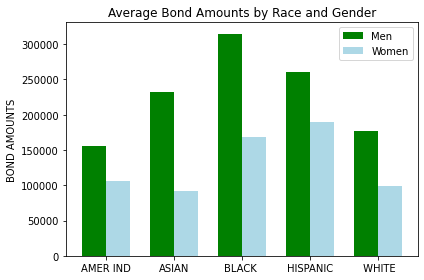

In [ ]:
#PLOT 1 Average Bond Amount between race & gender

labels = ['AMER IND', 'ASIAN', 'BLACK ', 'HISPANIC', ' WHITE']
men_means = [155748.532128, 232742.599207 , 315105.028987, 260895.535516, 177618.248335]
women_means = [106661.219359, 92160.597951, 168158.587609, 190246.443777, 98698.096450]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 =ax.bar(x - width/2, men_means, width, label='Men',color='green' )
rects2= ax.bar(x + width/2, women_means, width, label='Women', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('BOND AMOUNTS')
ax.set_title('Average Bond Amounts by Race and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# Group by Gender and Year
df_gender_year = df.groupby(['Year', 'GENDER']).sum()
df_gender_year

,,AGE,Bond
Year,GENDER,,
1980,M,3721,2135000
1988,M,884,170000
1993,M,1484,140000
1994,M,456,8000
1996,M,27491,114419050
1998,M,68,180000
1999,M,27191,14992500
2000,M,101180,341716800
2001,M,103429,187671450


In [ ]:
# Group by Gender and Year - Count
df_gender_year_count = df.groupby(['Year', 'GENDER']).count()
df_gender_year_count

,,Date,RACE,AGE,Bond,OFFENSE,offense_cat,violence_status
Year,GENDER,,,,,,,
1980,M,61,61,61,61,61,61,61
1988,M,17,17,17,17,17,17,17
1993,M,28,28,28,28,28,28,28
1994,M,8,8,8,8,8,8,8
1996,M,501,501,501,501,501,501,501
1998,M,2,2,2,2,2,2,2
1999,M,575,575,575,575,575,575,575
2000,M,2341,2341,2341,2341,2341,2341,2341
2001,M,2448,2448,2448,2448,2448,2448,2448


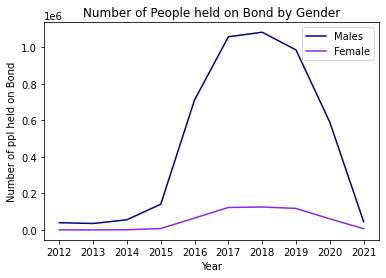

In [ ]:
#PLOT 2 (Created New DataFrame From 2012-2020) # of ppl on bond
year= ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

male=[39679,35444,55795,140871,711068,1056562,1081342,984552,588767,45224]
female = [620,306,1196,7846,65258,123036,125663,117879,60595,6996]
line_chart1 = plt.plot(year, male, color='navy')
line_chart2 = plt.plot(year, female, color='blueviolet')
plt.xlabel('Year',color="black")
plt.ylabel('Number of ppl held on Bond',color="black")
plt.title('Number of People held on Bond by Gender')
plt.legend(['Males', 'Female'], loc=1)
plt.show()

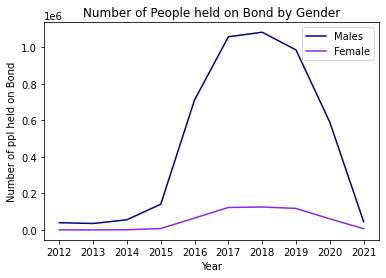

In [ ]:
#PLOT 2 (Created New DataFrame From 2012-2020) # of ppl on bond
year= ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

male=[39679,35444,55795,140871,711068,1056562,1081342,984552,588767,45224]
female = [620,306,1196,7846,65258,123036,125663,117879,60595,6996]
line_chart1 = plt.plot(year, male, color='navy')
line_chart2 = plt.plot(year, female, color='blueviolet')
plt.xlabel('Year',color="black")
plt.ylabel('Number of ppl held on Bond',color="black")
plt.title('Number of People held on Bond by Gender')
plt.legend(['Males', 'Female'], loc=1)
plt.show()

In [ ]:
# Have not yet figured out decade with another variable of race or gender - this gets error
# df_decade_race = df.groupby([(df.Year // 10 * 10), 'Race']).sum()
# df_decade_race.head()

## **EDA and Data Visualization with Matplotlib and Seaborn**

In [ ]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

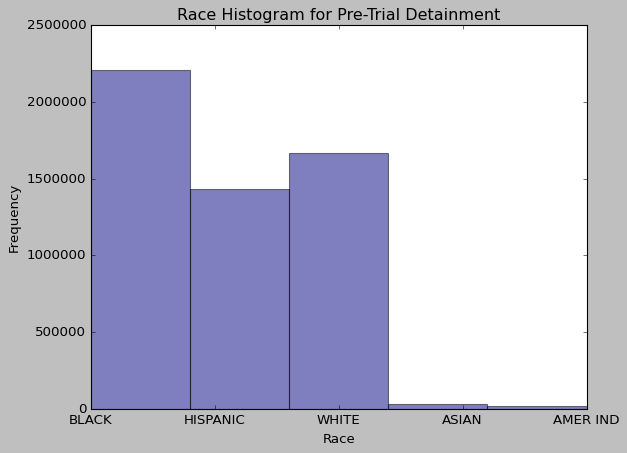

In [ ]:
# Race Histogram
plt.hist(df.RACE, bins=5, facecolor='navy', alpha=0.5)
plt.title('Race Histogram for Pre-Trial Detainment')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

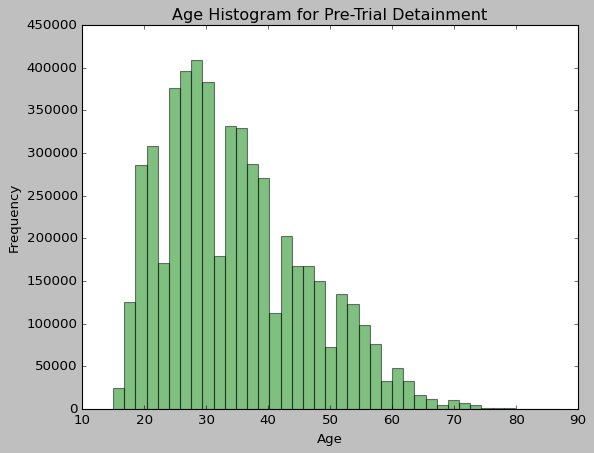

In [ ]:
# Age Histogram
plt.hist(df.AGE, bins=40, facecolor='green', alpha=0.5)
plt.title('Age Histogram for Pre-Trial Detainment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

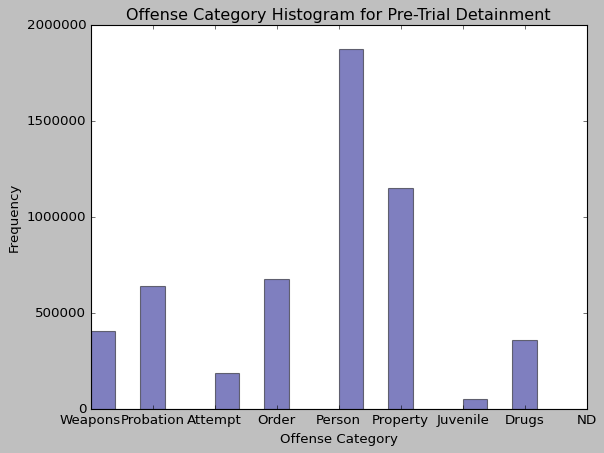

In [ ]:
# Offense Category Histogram
plt.hist(df.offense_cat, bins=20, facecolor='navy', alpha=0.5)
plt.title('Offense Category Histogram for Pre-Trial Detainment')
plt.xlabel('Offense Category')
plt.ylabel('Frequency')
plt.show()

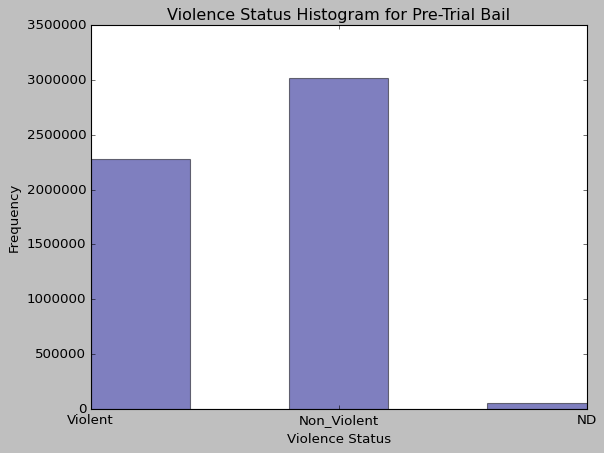

In [ ]:
# Violence Status  Histogram
plt.hist(df.violence_status, bins=5, facecolor='navy', alpha=0.5)
plt.title('Violence Status Histogram for Pre-Trial Bail')
plt.xlabel('Violence Status')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



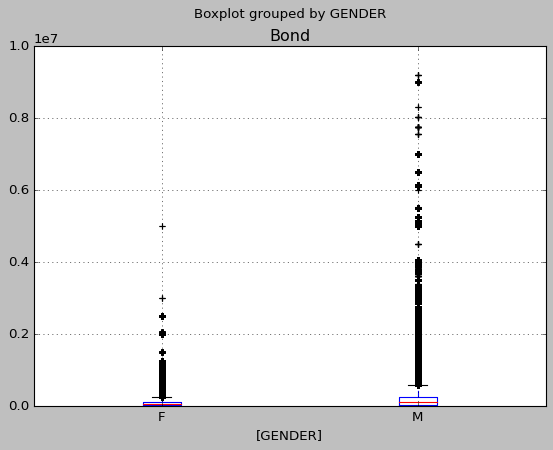

In [ ]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



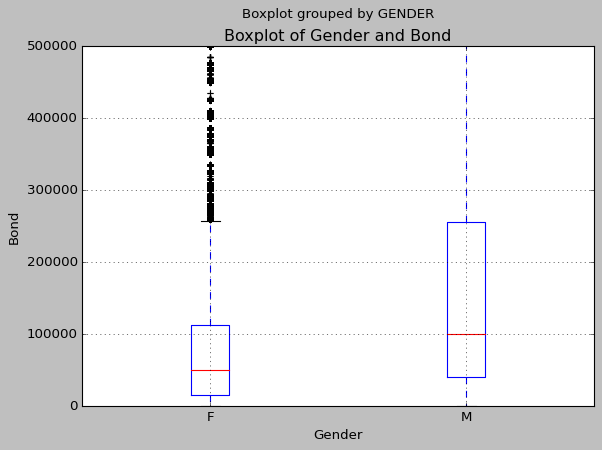

In [ ]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])
plt.ylim(0, 500000)
plt.xlabel("Gender")
plt.ylabel("Bond")
plt.title("Boxplot of Gender and Bond")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Text(0.5, 1.0, 'Boxplot of Race and Bond')

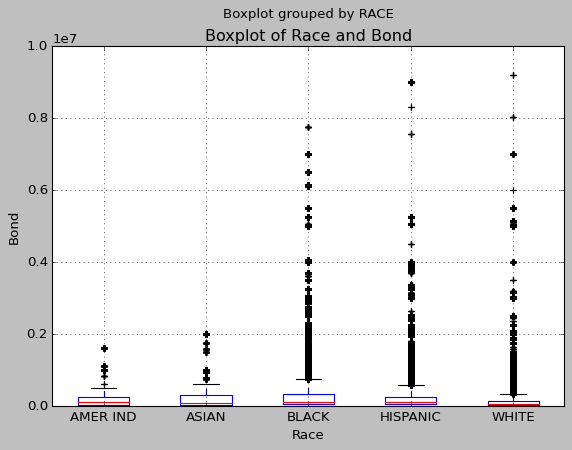

In [ ]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



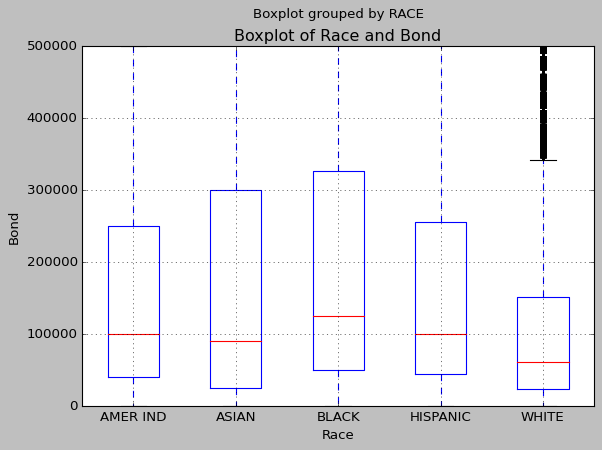

In [ ]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.ylim(0, 500000)
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")
plt.show()

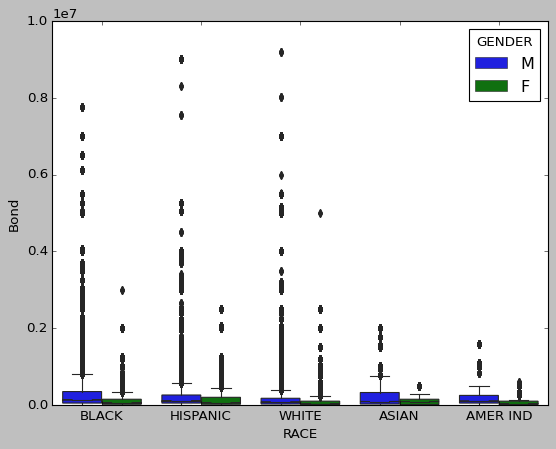

In [ ]:
#Importing required modules
import seaborn as sns
import pandas as ppd
 
 
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER' , notch = True )

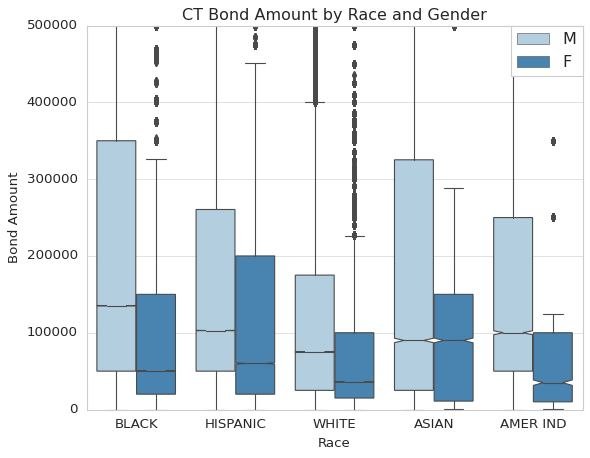

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(0, 500000)
plt.title('CT Bond Amount by Race and Gender')
plt.ylabel('Bond Amount')
plt.xlabel('Race')
plt.show()

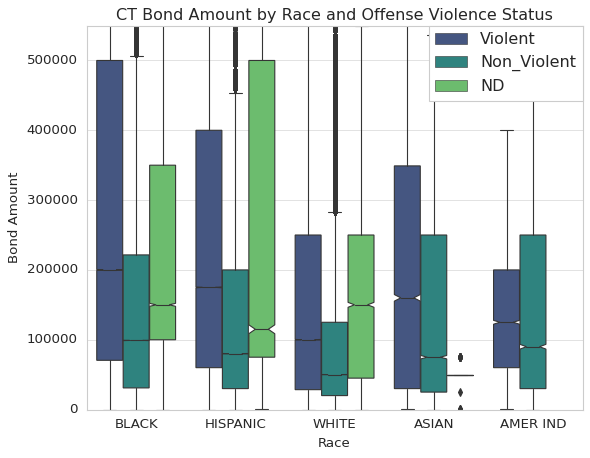

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'violence_status', notch = True, palette="viridis")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.title('CT Bond Amount by Race and Offense Violence Status')
plt.ylabel('Bond Amount')
plt.xlabel('Race')
plt.ylim(0, 550000)
plt.show()

In [ ]:
df.Bond.mean()

247738.79685189176

In [ ]:
df.Bond.median()

100000.0

In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent


In [ ]:
year = df.groupby([(df.Year)])


In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=df['Year'].astype(dtype=str), 
                        y=df['Bond'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Arrest Bookings by Date',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Bond"},
                   "showlegend": False})

fig.show()

##**Statistical Exploration**

In [ ]:
# Testing Bond for Normality with the the Shapiro-Wilk Test
from scipy.stats import shapiro
data = df.Bond
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

In [ ]:
df.head()

####**Correlation Tests for Race and Bond Amount**

In [ ]:
# Example of the Pearson's Correlation test
# This test only works with non-categorical variables, so Race and Gender do not work.
from scipy.stats import pearsonr
data1 = df.AGE
data2 = df.Bond
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

**Spearman’s Rank Correlation**
Tests whether two samples have a monotonic relationship.

**Assumptions**

Observations in each sample are independent and identically distributed (iid). Observations in each sample can be ranked.

**Interpretation**

H0: the two samples are independent. H1: there is a dependency between the samples.

Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

Python Code

In [ ]:
# Example of the Spearman's Rank Correlation Test
# Can use Categorical variables
from scipy.stats import spearmanr
data1 = df.RACE
data2 = df.Bond
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.175, p=0.000000000
Probably dependent


In [ ]:
# Example of the Spearman's Rank Correlation Test
# Can use Categorical variables
# Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed
from scipy.stats import spearmanr
data1 = df.violence_status
data2 = df.Bond
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

In [ ]:
# Example of the Spearman's Rank Correlation Test
# Can use Categorical variables
from scipy.stats import spearmanr
data1 = df.GENDER
data2 = df.Bond
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The statistics number ranges between 0 and 1.  Here there is a positive correlation.

**Kendall’s Rank Correlation**

Tests whether two samples have a monotonic relationship.

**Assumptions**

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.

**Interpretation**

H0: the two samples are independent.
H1: there is a dependency between the samples.

Python Code

In [ ]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = df.Bond
data2 = df.RACE
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

In [ ]:
df.head()

#### **Chi-Squared Test**
Tests whether two categorical variables are related or independent.

**Assumptions**

Observations used in the calculation of the contingency table are independent.
25 or more examples in each cell of the contingency table.

**Interpretation**

H0: the two samples are independent.
H1: there is a dependency between the samples.

Python Code

In [ ]:
contigency= pd.crosstab(df['RACE'], df['violence_status'])
contigency

In [ ]:
contigency_pct = pd.crosstab(df['RACE'], df['violence_status'], normalize='index')
contigency_pct

In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency_pct)
p

In [ ]:
df.info()


In [ ]:
df.head()

In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [df.RACE, df.offense_cat]
table

[0             BLACK
 1          HISPANIC
 2          HISPANIC
 3             WHITE
 4          HISPANIC
              ...   
 5351844       BLACK
 5351845    HISPANIC
 5351846       WHITE
 5351847    HISPANIC
 5351848       WHITE
 Name: RACE, Length: 5351849, dtype: object, 0            Weapons
 1          Probation
 2            Attempt
 3              Order
 4            Attempt
              ...    
 5351844     Property
 5351845     Property
 5351846     Property
 5351847      Weapons
 5351848    Probation
 Name: offense_cat, Length: 5351849, dtype: object]

In [ ]:
#https://www.askpython.com/python/examples/chi-square-test
chisqt = pd.crosstab(df.RACE, df.offense_cat, margins=True)
print(chisqt)

offense_cat  Attempt   Drugs  Juvenile  ...  Property  Weapons      All
RACE                                    ...                            
AMER IND        1053     744         0  ...      4399     1817    16758
ASIAN           1374    2909       227  ...     10249      801    31994
BLACK          85300  158066     34707  ...    461783   237115  2206677
HISPANIC       49566   97507     11000  ...    302580   108126  1432744
WHITE          51929   98410      8033  ...    373538    57976  1663676
All           189222  357636     53967  ...   1152549   405835  5351849

[6 rows x 10 columns]


In [ ]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pd.crosstab(df.RACE, df.offense_cat, margins=True)
value = np.array([chisqt.iloc[0][0:11].values,
                  chisqt.iloc[1][0:11].values,
                  chisqt.iloc[2][0:11].values,
                  chisqt.iloc[3][0:11].values,
                  chisqt.iloc[4][0:11].values,
                  chisqt.iloc[5][0:11].values,
                  ])
print(chi2_contingency(value)[0:3])

(190841.68948728684, 0.0, 45)


From above, [the first number] is the p-value, [the second number] is the statistical value and [the third number] is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables [  ] and [  ] are independent of each other.

In [ ]:
chisqt = pd.crosstab(df.RACE, df.violence_status, margins=True)
print(chisqt)

violence_status     ND  Non_Violent  Violent      All
RACE                                                 
AMER IND             0        10328     6430    16758
ASIAN              231        20464    11299    31994
BLACK            35041      1138325  1033311  2206677
HISPANIC         11037       758310   663397  1432744
WHITE             8354      1087068   568254  1663676
All              54663      3014495  2282691  5351849


In [ ]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pd.crosstab(df.RACE, df.violence_status, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values,
                  chisqt.iloc[2][0:5].values,
                  chisqt.iloc[3][0:5].values,
                  chisqt.iloc[4][0:5].values,
                  chisqt.iloc[5][0:5].values,
                  ])
print(chi2_contingency(value)[0:3])

(90693.27675332432, 0.0, 15)


In [ ]:
# Example of the Chi-Squared Test
#from scipy.stats import chi2_contingency
#table = [df.RACE, df.offense_cat]
#stat, p, dof, expected = chi2_contingency(table)
#print('stat=%.3f, p=%.3f' % (stat, p))
#if p > 0.05:
	print('Probably independent')
#else:
	print('Probably dependent')

IndentationError: ignored

In [ ]:
chisqt = pd.crosstab(df.RACE, df.violence_status, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')



stat=90693.277, p=0.000000000
Probably dependent


In [ ]:
chisqt = pd.crosstab(df.RACE, df.offense_cat, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=190841.689, p=0.000000000
Probably dependent


In [ ]:
chisqt = pd.crosstab(df.RACE, df.Bond, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=2008383.174, p=0.000000000
Probably dependent
